In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:



df = pd.read_csv('/content/bengaluru_house_prices - bengaluru_house_prices.csv')


print(df.head())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0   Coomee       1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


cleaning

In [ ]:
df = df.drop('society', axis=1)


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.shape

(12710, 8)

In [ ]:
# prompt: find how many duplicates in this data set

# Count duplicates based on all columns
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)

print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 565


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(12145, 8)

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262,2.0,2.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [ ]:
import pandas as pd

def convert_sqft_to_num(x):
    """Converts sqft string to a single numeric value (average if range)."""
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except (TypeError, ValueError):
        return None  # Handle non-numeric or invalid values

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df['total_sqft'] = df['total_sqft'].astype(float)

In [ ]:
df.shape

(12145, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   size          12145 non-null  object 
 4   total_sqft    12103 non-null  float64
 5   bath          12145 non-null  float64
 6   balcony       12145 non-null  float64
 7   price         12145 non-null  float64
dtypes: float64(4), object(4)
memory usage: 853.9+ KB


In [ ]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
unique_total_sqft = df['total_sqft'].unique()
print(unique_total_sqft)

[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2.0,2.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   size          12145 non-null  object 
 4   total_sqft    12103 non-null  float64
 5   bath          12145 non-null  float64
 6   balcony       12145 non-null  float64
 7   price         12145 non-null  float64
dtypes: float64(4), object(4)
memory usage: 853.9+ KB


In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:

df['size'] = df['size'].str.split().str[0].astype(int)

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2,1262.0,2.0,2.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00


In [ ]:
df['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   size          12145 non-null  int64  
 4   total_sqft    12103 non-null  float64
 5   bath          12145 non-null  float64
 6   balcony       12145 non-null  float64
 7   price         12145 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 853.9+ KB


In [ ]:
df.describe()

,size,total_sqft,bath,balcony,price
count,12145.000000,12103.000000,12145.000000,12145.000000,12145.000000
mean,2.750762,1521.515663,2.632688,1.582544,107.792364
std,1.222206,1184.860612,1.241918,0.823401,134.203015
min,1.000000,5.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1268.000000,2.000000,2.000000,70.000000
75%,3.000000,1650.000000,3.000000,2.000000,115.000000
max,43.000000,52272.000000,40.000000,3.000000,2912.000000


In [ ]:


df = df.drop('availability', axis=1)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


visualization

In [ ]:
#univariate analysis
#histograms


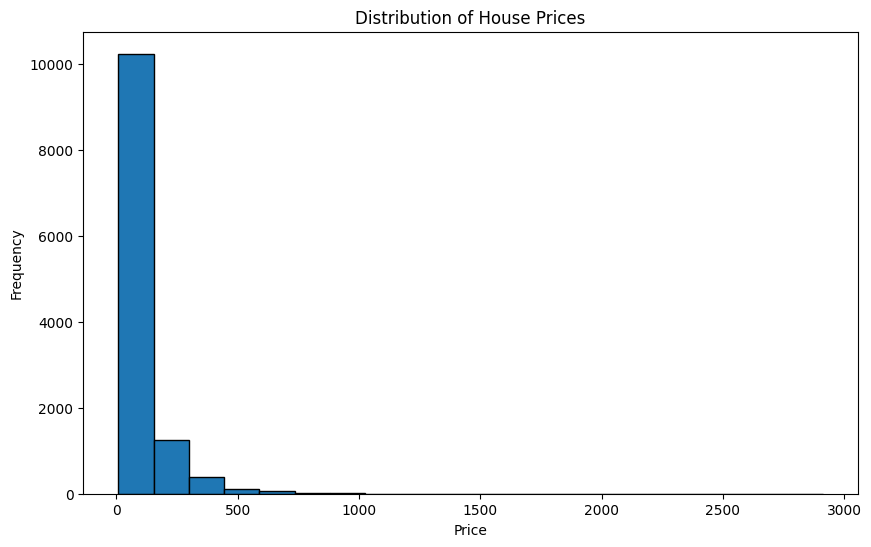

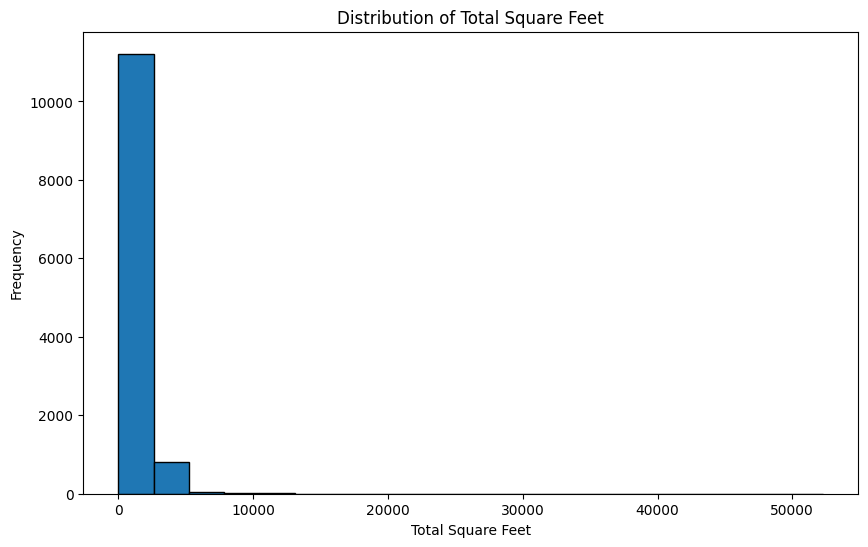

In [ ]:
# prompt: histogram plot of to understand the distribution of numarical data

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# plt.figure(figsize=(10, 6))
# plt.hist(df['size'], bins=20, edgecolor='black')
# plt.xlabel('Size')
# plt.ylabel('Frequency')
# plt.title('Distribution of House Sizes')
# plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['total_sqft'], bins=20, edgecolor='black')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.title('Distribution of Total Square Feet')
plt.show()

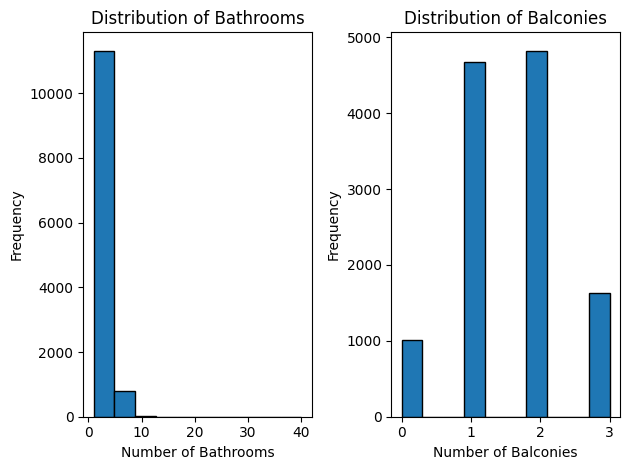

In [ ]:

    plt.subplot(1, 2, 1)
    plt.hist(df['bath'], bins=10, edgecolor='black')
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Frequency')
    plt.title('Distribution of Bathrooms')

    plt.subplot(1, 2, 2)
    plt.hist(df['balcony'], bins=10, edgecolor='black')
    plt.xlabel('Number of Balconies')
    plt.ylabel('Frequency')
    plt.title('Distribution of Balconies')

    plt.tight_layout()
    plt.show()


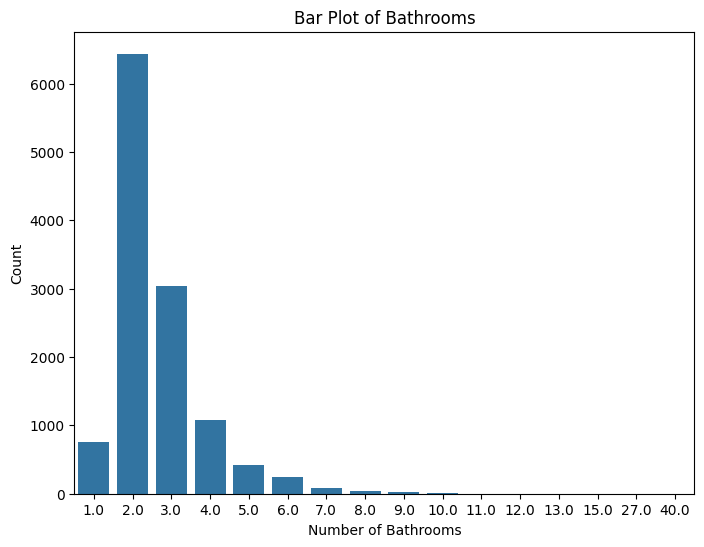

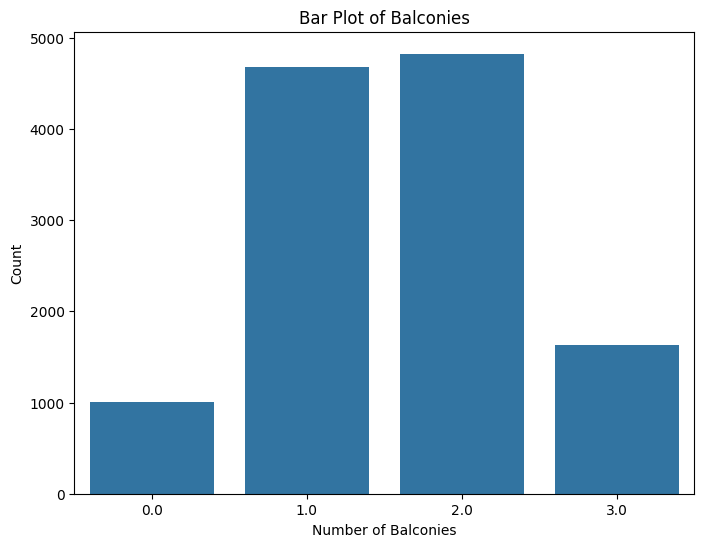

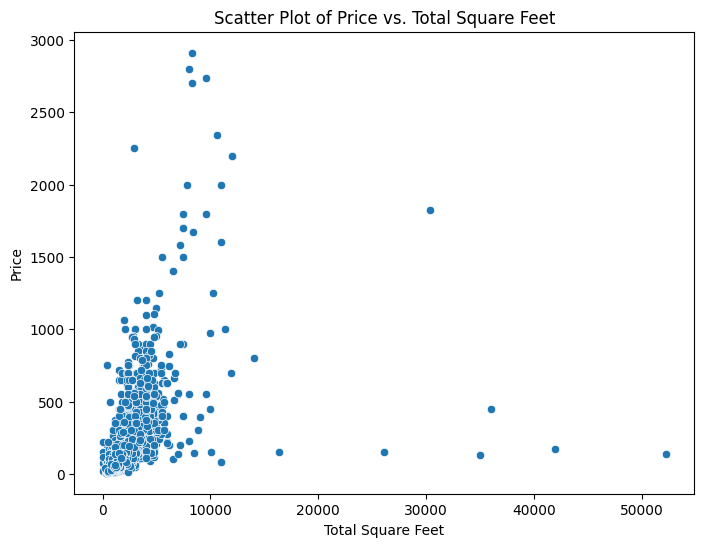

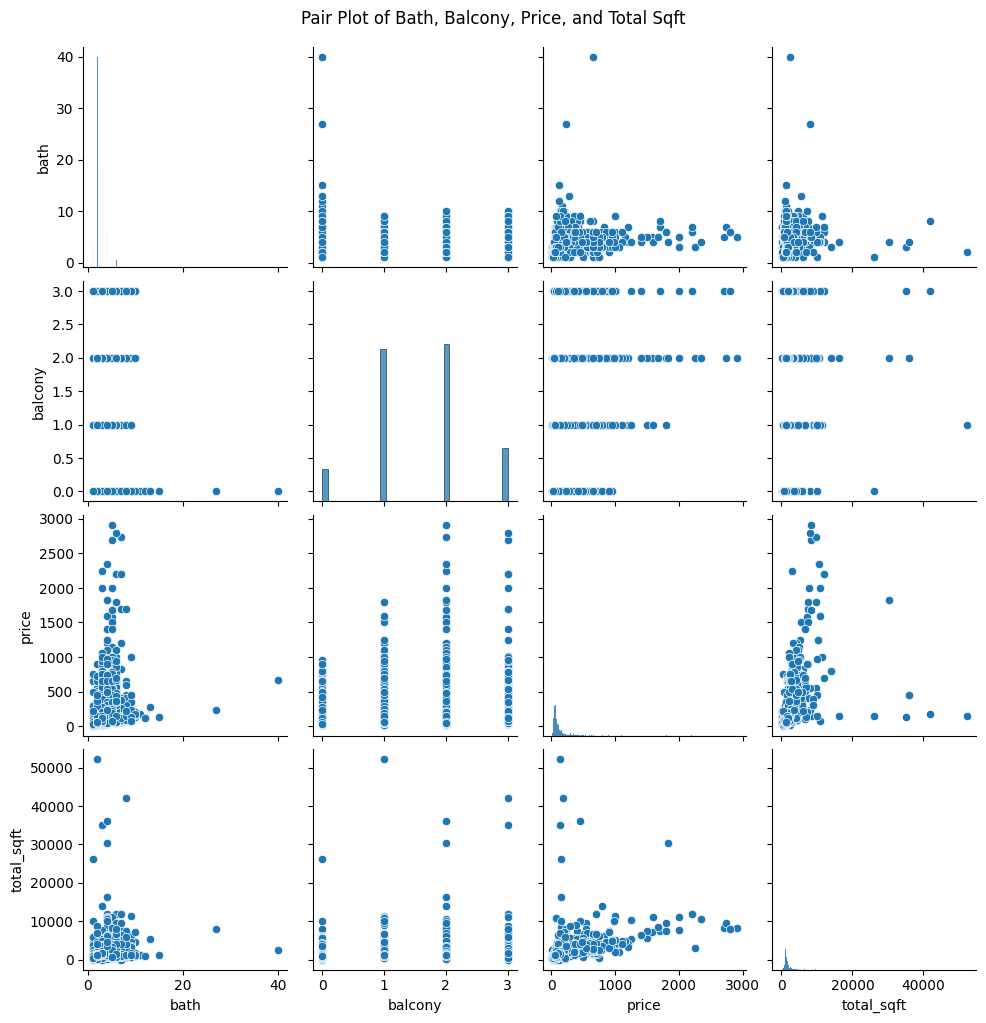

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='bath', data=df)
plt.title('Bar Plot of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='balcony', data=df)
plt.title('Bar Plot of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)  # Changed 'totalsqft' to 'total_sqft'
plt.title('Scatter Plot of Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()


# Pair plot of 'bath', 'balcony', 'price', and 'totalsqft'
sns.pairplot(df[['bath', 'balcony', 'price', 'total_sqft']])
plt.suptitle('Pair Plot of Bath, Balcony, Price, and Total Sqft', y=1.02)
plt.show()

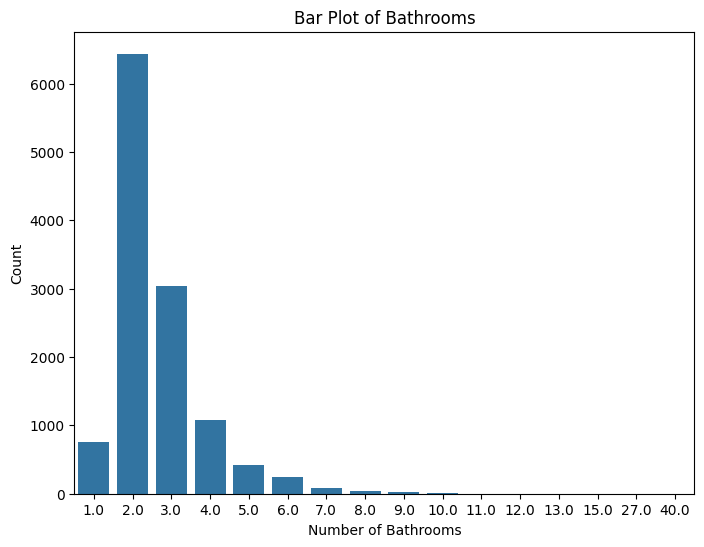

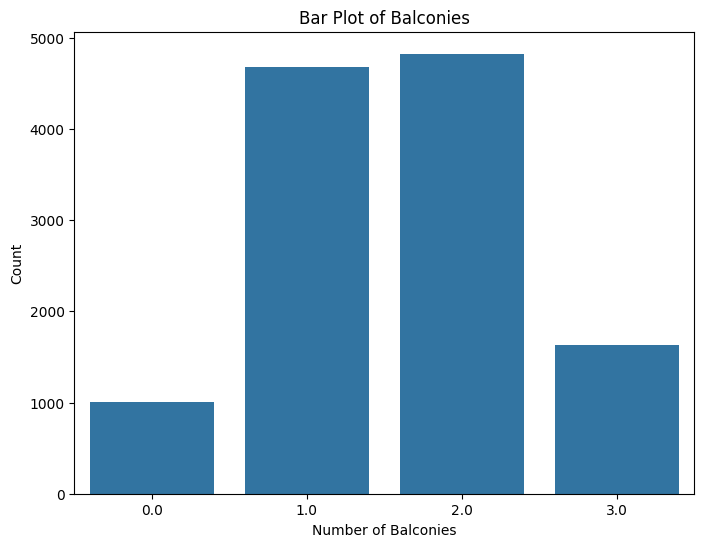

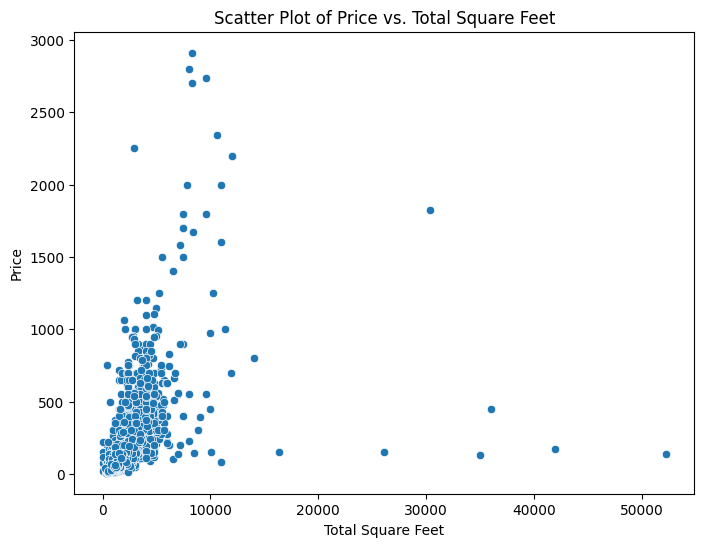

<Figure size 640x480 with 0 Axes>

In [ ]:


# Bar plot of 'bath'
plt.figure(figsize=(8, 6))
sns.countplot(x='bath', data=df)
plt.title('Bar Plot of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

# Bar plot of 'balcony'
plt.figure(figsize=(8, 6))
sns.countplot(x='balcony', data=df)
plt.title('Bar Plot of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot of Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()


plt.suptitle('Pair Plot of Bath, Balcony, Price, and Total Sqft', y=1.02)
plt.show()

In [ ]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00


In [ ]:
df1 = df.copy()

In [ ]:
df1['location']=LabelEncoder().fit_transform(df1['location'])
df1['area_type']=LabelEncoder().fit_transform(df1['area_type'])


In [ ]:
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,3,393,2,1056.0,2.0,1.0,39.07
1,2,292,4,2600.0,5.0,3.0,120.00
2,0,1128,3,1440.0,2.0,3.0,62.00
3,3,724,3,1521.0,3.0,1.0,95.00
4,3,683,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13312,3,214,2,1262.0,2.0,2.0,47.00
13314,3,448,3,1715.0,3.0,3.0,112.00
13315,0,1200,5,3453.0,4.0,0.0,231.00
13317,0,930,2,1141.0,2.0,1.0,60.00


<Axes: >

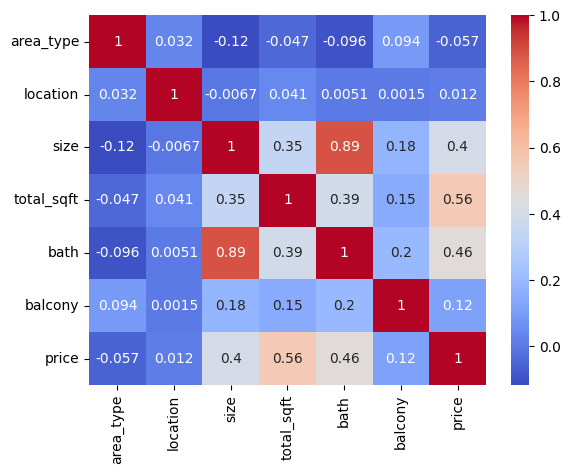

In [ ]:
sns.heatmap(  df1.corr(),annot=True,cmap='coolwarm')

In [ ]:


df1 = df.drop(['area_type', 'location'], axis=1)
df1

,size,total_sqft,bath,balcony,price
0,2,1056.0,2.0,1.0,39.07
1,4,2600.0,5.0,3.0,120.00
2,3,1440.0,2.0,3.0,62.00
3,3,1521.0,3.0,1.0,95.00
4,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...
13312,2,1262.0,2.0,2.0,47.00
13314,3,1715.0,3.0,3.0,112.00
13315,5,3453.0,4.0,0.0,231.00
13317,2,1141.0,2.0,1.0,60.00


<Axes: >

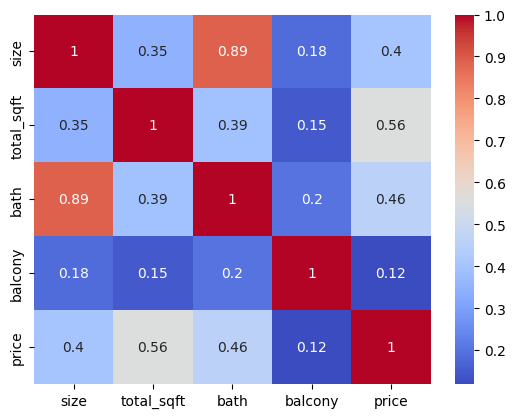

In [ ]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [ ]:
df2=df.copy()

<Axes: ylabel='bath'>

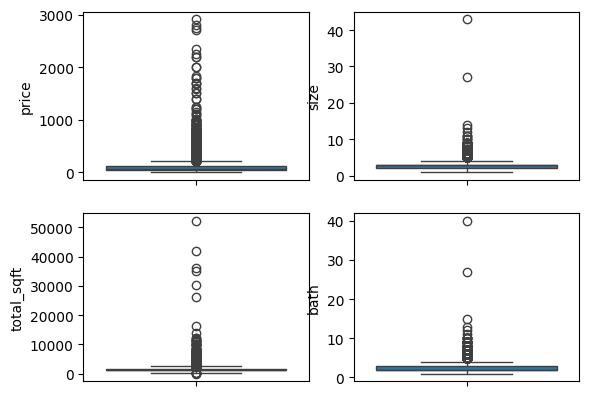

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(df2['price'])
plt.subplot(2,2,2)
sns.boxplot(df2['size'])
plt.subplot(2,2,3)
sns.boxplot(df2['total_sqft'])
plt.subplot(2,2,4)
sns.boxplot(df2['bath'])

In [ ]:
def detect_iqr_outliers(column):
  q1=column.quantile(0.25)
  q3=column.quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return(column < lower_bound) | (column > upper_bound)

# Apply the function to numerical columns
outliers_iqr =df2[['size','total_sqft','bath','balcony','price']].apply(detect_iqr_outliers)

# view outliers
print('outliers detected using IQR:')
print(outliers_iqr.sum())

outliers detected using IQR:
size           682
total_sqft    1029
bath           831
balcony          0
price         1150
dtype: int64


In [ ]:
from scipy.stats import zscore
z_score=df2[['size','total_sqft','bath','balcony','price']].apply(zscore)
threshold=3
outliers_zscore=abs(z_score)>threshold
print('outliers detected using Z-score:')
print(outliers_zscore.sum())

outliers detected using Z-score:
size          197
total_sqft      0
bath          162
balcony         0
price         186
dtype: int64


In [ ]:
df2=df2[~outliers_iqr.any(axis=1)]
print(
    f'Number of rows after removing outliers: {df2.shape[0]}'
)

Number of rows after removing outliers: 10234


In [ ]:
df2.shape

(10234, 7)

In [ ]:
print(df1.shape)
print(df2.shape)

(12145, 5)
(10234, 7)


In [ ]:
df3=df2.copy()

feature engineering

In [ ]:
df3

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...
13308,Built-up Area,Bannerghatta Road,3,1527.0,3.0,1.0,142.00
13310,Super built-up Area,Rachenahalli,2,1050.0,2.0,2.0,52.71
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00


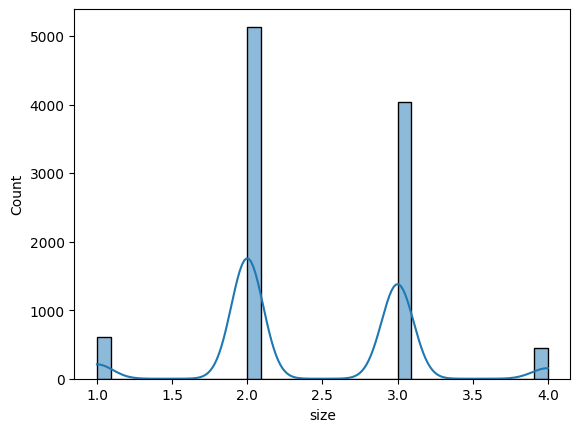

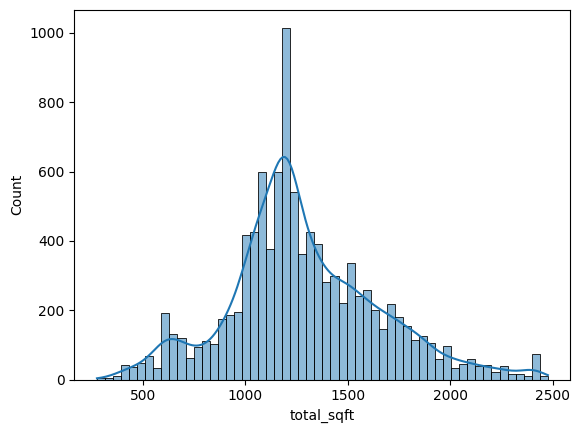

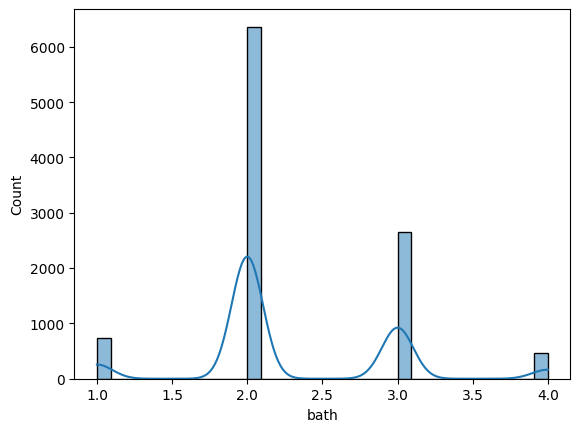

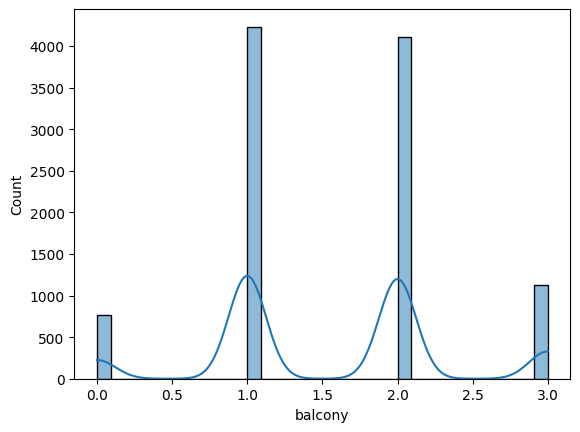

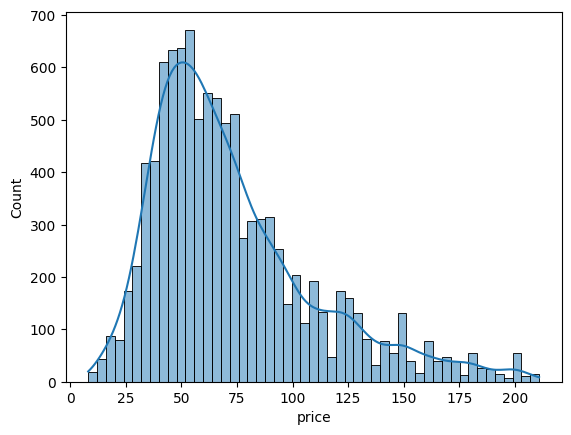

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df3' is your DataFrame

# To create individual histograms:
sns.histplot(df3['size'],kde=True)
plt.show()

sns.histplot(df3['total_sqft'],kde=True)
plt.show()

sns.histplot(df3['bath'],kde=True)
plt.show()

sns.histplot(df3['balcony'],kde=True)
plt.show()

sns.histplot(df3['price'],kde=True)
plt.show()



In [ ]:
skw=df3[['size','total_sqft','bath','balcony','price']].skew()
print(skw)

size          0.126594
total_sqft    0.414065
bath          0.575335
balcony       0.062805
price         1.208140
dtype: float64


In [ ]:
skw=df1[['size','total_sqft','bath','balcony','price']].skew()
print(skw)

size           5.276156
total_sqft    17.280340
bath           4.573627
balcony        0.009576
price          7.762910
dtype: float64


In [ ]:
df3['price_log'] = np.log1p(df3['price'])
df3['price_sqrt'] = np.sqrt(df3['price'])

price_skewness = df3['price'].skew()


print(f"Skewness of price_sqrt: {df3['price_sqrt'].skew()}")
print(f"Skewness of price_log: {df3['price_log'].skew()}")
print(f"Skewness of price: {price_skewness}")

Skewness of price_sqrt: 0.6062686945481798
Skewness of price_log: -0.07472151598641509
Skewness of price: 1.2081401126821254


In [ ]:
df3

,area_type,location,size,total_sqft,bath,balcony,price,price_log,price_sqrt
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3.690628,6.250600
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4.143135,7.874008
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,4.564348,9.746794
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,3.951244,7.141428
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00,3.663562,6.164414
...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Bannerghatta Road,3,1527.0,3.0,1.0,142.00,4.962845,11.916375
13310,Super built-up Area,Rachenahalli,2,1050.0,2.0,2.0,52.71,3.983599,7.260165
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00,3.871201,6.855655
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,4.727388,10.583005


In [ ]:


df3 = df3.drop('price_sqrt', axis=1)

In [ ]:
df3

,area_type,location,size,total_sqft,bath,balcony,price,price_log
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3.690628
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4.143135
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,4.564348
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,3.951244
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00,3.663562
...,...,...,...,...,...,...,...,...
13308,Built-up Area,Bannerghatta Road,3,1527.0,3.0,1.0,142.00,4.962845
13310,Super built-up Area,Rachenahalli,2,1050.0,2.0,2.0,52.71,3.983599
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00,3.871201
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,4.727388


In [ ]:


le = LabelEncoder()
df3['location'] = le.fit_transform(df3['location'])
df3['location']

,location
0,339
2,984
3,632
4,598
5,1045
...,...
13308,164
13310,800
13312,182
13314,386


In [ ]:
df3

,area_type,location,size,total_sqft,bath,balcony,price,price_log
0,Super built-up Area,339,2,1056.0,2.0,1.0,39.07,3.690628
2,Built-up Area,984,3,1440.0,2.0,3.0,62.00,4.143135
3,Super built-up Area,632,3,1521.0,3.0,1.0,95.00,4.564348
4,Super built-up Area,598,2,1200.0,2.0,1.0,51.00,3.951244
5,Super built-up Area,1045,2,1170.0,2.0,1.0,38.00,3.663562
...,...,...,...,...,...,...,...,...
13308,Built-up Area,164,3,1527.0,3.0,1.0,142.00,4.962845
13310,Super built-up Area,800,2,1050.0,2.0,2.0,52.71,3.983599
13312,Super built-up Area,182,2,1262.0,2.0,2.0,47.00,3.871201
13314,Super built-up Area,386,3,1715.0,3.0,3.0,112.00,4.727388


In [ ]:
locaion_labals=dict(zip(le.classes_,le.transform(le.classes_)))
locaion_labals

{'12th cross srinivas nagar banshankari 3rd stage': 0,
 '1st Block BEL Layout': 1,
 '1st Block HBR Layout': 2,
 '1st Block HRBR Layout': 3,
 '1st Block Jayanagar': 4,
 '1st Block Koramangala': 5,
 '1st Phase JP Nagar': 6,
 '1st Stage Domlur': 7,
 '1st Stage Indira Nagar': 8,
 '2 Bedroom Furnished Farm House in Kolar Road': 9,
 '2nd Block Bel Layout': 10,
 '2nd Block Hrbr Layout': 11,
 '2nd Block Jayanagar': 12,
 '2nd Phase JP Nagar': 13,
 '2nd Phase Judicial Layout': 14,
 '2nd Stage Arekere Mico Layout': 15,
 '2nd Stage Nagarbhavi': 16,
 '2nd phase jp nagar, jp nagar': 17,
 '3rd Block Banashankari': 18,
 '3rd Block HBR Layout': 19,
 '3rd Block Hrbr Layout': 20,
 '3rd Block Jayanagar': 21,
 '3rd Block Koramangala': 22,
 '3rd Phase Iti Layout': 23,
 '3rd Phase JP Nagar': 24,
 '3rd Stage Raja Rajeshwari Nagar': 25,
 '4th Block Jayanagar': 26,
 '4th Block Koramangala': 27,
 '4th Phase JP Nagar': 28,
 '4th T block Jayanagar': 29,
 '5th Block Hbr Layout': 30,
 '5th Block Jayanagar': 31,
 '5t

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10234 entries, 0 to 13317
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10234 non-null  object 
 1   location    10234 non-null  int64  
 2   size        10234 non-null  int64  
 3   total_sqft  10202 non-null  float64
 4   bath        10234 non-null  float64
 5   balcony     10234 non-null  float64
 6   price       10234 non-null  float64
 7   price_log   10234 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 719.6+ KB


In [ ]:
df3.nunique()

,0
area_type,4
location,1089
size,4
total_sqft,1437
bath,4
balcony,4
price,1650
price_log,1650


In [ ]:
# Instead of df3.unique(), iterate through each column:
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'area_type': ['Super built-up  Area' 'Built-up  Area' 'Plot  Area' 'Carpet  Area']
Unique values in column 'location': [339 984 632 ... 864   0  50]
Unique values in column 'size': [2 3 1 4]
Unique values in column 'total_sqft': [1056.  1440.  1521.  ...  613.  2395.  1258.5]
Unique values in column 'bath': [2. 3. 1. 4.]
Unique values in column 'balcony': [1. 3. 2. 0.]
Unique values in column 'price': [39.07 62.   95.   ... 96.8  63.93 40.14]
Unique values in column 'price_log': [3.69062792 4.14313473 4.56434819 ... 4.58292458 4.17330977 3.71698088]


In [ ]:
df3

,area_type,location,size,total_sqft,bath,balcony,price,price_log
0,Super built-up Area,339,2,1056.0,2.0,1.0,39.07,3.690628
2,Built-up Area,984,3,1440.0,2.0,3.0,62.00,4.143135
3,Super built-up Area,632,3,1521.0,3.0,1.0,95.00,4.564348
4,Super built-up Area,598,2,1200.0,2.0,1.0,51.00,3.951244
5,Super built-up Area,1045,2,1170.0,2.0,1.0,38.00,3.663562
...,...,...,...,...,...,...,...,...
13308,Built-up Area,164,3,1527.0,3.0,1.0,142.00,4.962845
13310,Super built-up Area,800,2,1050.0,2.0,2.0,52.71,3.983599
13312,Super built-up Area,182,2,1262.0,2.0,2.0,47.00,3.871201
13314,Super built-up Area,386,3,1715.0,3.0,3.0,112.00,4.727388


In [ ]:
area_type_dummies = pd.get_dummies(df3['area_type'], prefix='area_type',dtype=int)

df3 = pd.concat([df3, area_type_dummies], axis=1)

df3 = df3.drop('area_type', axis=1)


In [ ]:
df3

,location,size,total_sqft,bath,balcony,price,price_log,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,339,2,1056.0,2.0,1.0,39.07,3.690628,0,0,0,1
2,984,3,1440.0,2.0,3.0,62.00,4.143135,1,0,0,0
3,632,3,1521.0,3.0,1.0,95.00,4.564348,0,0,0,1
4,598,2,1200.0,2.0,1.0,51.00,3.951244,0,0,0,1
5,1045,2,1170.0,2.0,1.0,38.00,3.663562,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13308,164,3,1527.0,3.0,1.0,142.00,4.962845,1,0,0,0
13310,800,2,1050.0,2.0,2.0,52.71,3.983599,0,0,0,1
13312,182,2,1262.0,2.0,2.0,47.00,3.871201,0,0,0,1
13314,386,3,1715.0,3.0,3.0,112.00,4.727388,0,0,0,1


<Axes: >

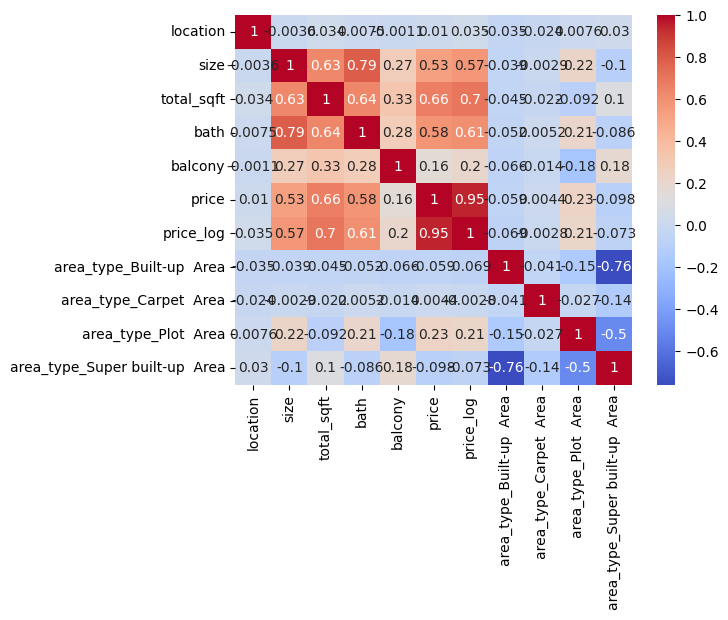

In [ ]:
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10234 entries, 0 to 13317
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        10234 non-null  int64  
 1   size                            10234 non-null  int64  
 2   total_sqft                      10202 non-null  float64
 3   bath                            10234 non-null  float64
 4   balcony                         10234 non-null  float64
 5   price                           10234 non-null  float64
 6   price_log                       10234 non-null  float64
 7   area_type_Built-up  Area        10234 non-null  int64  
 8   area_type_Carpet  Area          10234 non-null  int64  
 9   area_type_Plot  Area            10234 non-null  int64  
 10  area_type_Super built-up  Area  10234 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 959.4 KB


In [ ]:
df4=df3.copy()

In [ ]:
df4

,location,size,total_sqft,bath,balcony,price,price_log,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,339,2,1056.0,2.0,1.0,39.07,3.690628,0,0,0,1
2,984,3,1440.0,2.0,3.0,62.00,4.143135,1,0,0,0
3,632,3,1521.0,3.0,1.0,95.00,4.564348,0,0,0,1
4,598,2,1200.0,2.0,1.0,51.00,3.951244,0,0,0,1
5,1045,2,1170.0,2.0,1.0,38.00,3.663562,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13308,164,3,1527.0,3.0,1.0,142.00,4.962845,1,0,0,0
13310,800,2,1050.0,2.0,2.0,52.71,3.983599,0,0,0,1
13312,182,2,1262.0,2.0,2.0,47.00,3.871201,0,0,0,1
13314,386,3,1715.0,3.0,3.0,112.00,4.727388,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
df_minmax_scaled=minmax_scaler.fit_transform(df4)

In [ ]:
df_minmax_scaled

array([[0.31158088, 0.33333333, 0.35470668, ..., 0.        , 0.        ,
        1.        ],
       [0.90441176, 0.66666667, 0.52933151, ..., 0.        , 0.        ,
        0.        ],
       [0.58088235, 0.66666667, 0.56616644, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.16727941, 0.33333333, 0.44838563, ..., 0.        , 0.        ,
        1.        ],
       [0.35477941, 0.66666667, 0.65438836, ..., 0.        , 0.        ,
        1.        ],
       [0.74172794, 0.33333333, 0.39336062, ..., 0.        , 0.        ,
        0.        ]])

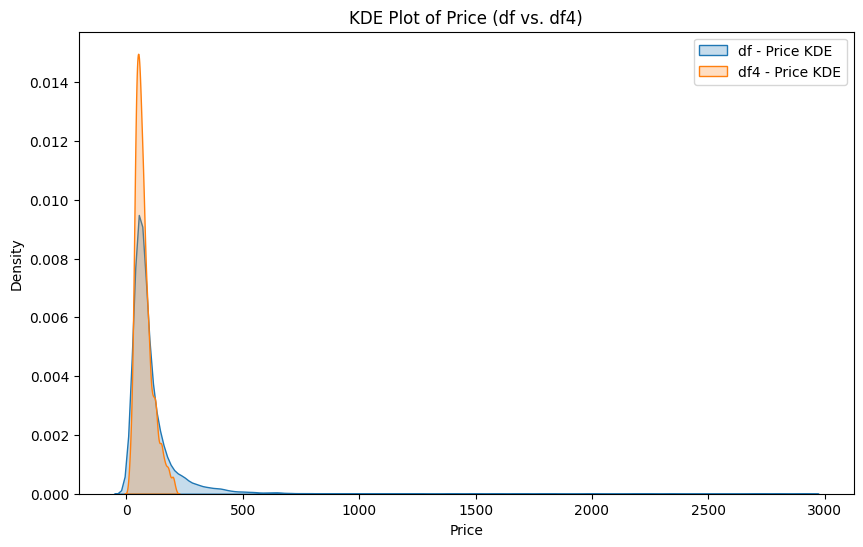

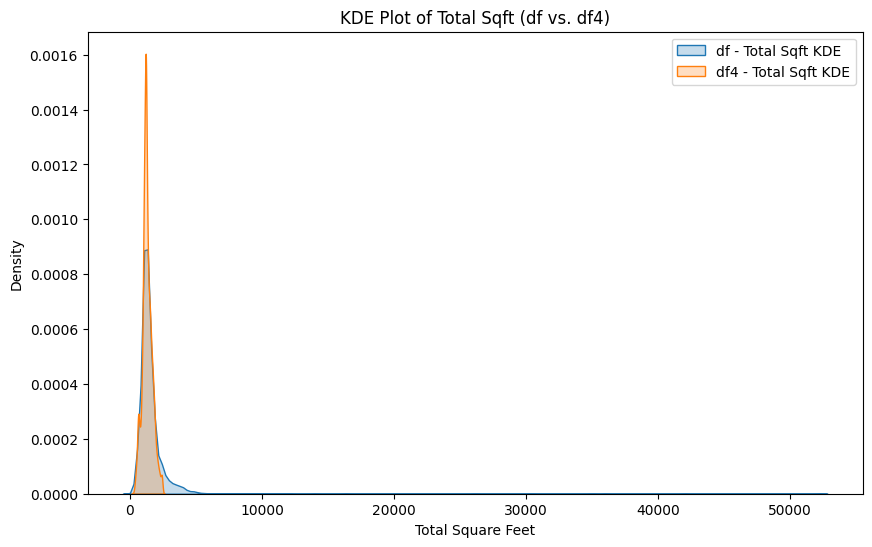

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and df4 are defined as in your provided code

plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], label='df - Price KDE', fill=True)
sns.kdeplot(df4['price'], label='df4 - Price KDE', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of Price (df vs. df4)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['total_sqft'], label='df - Total Sqft KDE', fill=True)
sns.kdeplot(df4['total_sqft'], label='df4 - Total Sqft KDE', fill=True)
plt.xlabel('Total Square Feet')
plt.ylabel('Density')
plt.title('KDE Plot of Total Sqft (df vs. df4)')
plt.legend()
plt.show()

In [ ]:
#df4 standerdisation

from sklearn.preprocessing import StandardScaler
stnderd0_scaler=StandardScaler()
df_standerd_scaled=stnderd0_scaler.fit_transform(df4)
df_standerd_scaled

array([[-0.69729843, -0.62850014, -0.61280199, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [ 1.39736333,  0.85937181,  0.42349487, ..., -0.08592215,
        -0.3118406 , -1.60571532],
       [ 0.25423009,  0.85937181,  0.64208873, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       ...,
       [-1.20716184, -0.62850014, -0.0568719 , ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [-0.54466416,  0.85937181,  1.16563454, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [ 0.82254917, -0.62850014, -0.38341336, ..., -0.08592215,
        -0.3118406 , -1.60571532]])

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df4_scaled = scaler.fit_transform(df4) # Use numerical_cols here as well


df4_scaled




array([[-0.69729843, -0.62850014, -0.61280199, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [ 1.39736333,  0.85937181,  0.42349487, ..., -0.08592215,
        -0.3118406 , -1.60571532],
       [ 0.25423009,  0.85937181,  0.64208873, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       ...,
       [-1.20716184, -0.62850014, -0.0568719 , ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [-0.54466416,  0.85937181,  1.16563454, ..., -0.08592215,
        -0.3118406 ,  0.6227754 ],
       [ 0.82254917, -0.62850014, -0.38341336, ..., -0.08592215,
        -0.3118406 , -1.60571532]])

In [ ]:
df4_scaled=pd.DataFrame(df4_scaled,columns=df4.columns)
df4_scaled

,location,size,total_sqft,bath,balcony,price,price_log,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,-0.697298,-0.628500,-0.612802,-0.423455,-0.694211,-0.911896,-1.017863,-0.474077,-0.085922,-0.311841,0.622775
1,1.397363,0.859372,0.423495,-0.423455,1.849033,-0.295092,-0.088906,2.109363,-0.085922,-0.311841,-1.605715
2,0.254230,0.859372,0.642089,1.087578,-0.694211,0.592589,0.775809,-0.474077,-0.085922,-0.311841,0.622775
3,0.143814,-0.628500,-0.224191,-0.423455,-0.694211,-0.590986,-0.482841,-0.474077,-0.085922,-0.311841,0.622775
4,1.595463,-0.628500,-0.305151,-0.423455,-0.694211,-0.940678,-1.073428,-0.474077,-0.085922,-0.311841,0.622775
...,...,...,...,...,...,...,...,...,...,...,...
10229,-1.265618,0.859372,0.658281,1.087578,-0.694211,1.856862,1.593887,2.109363,-0.085922,-0.311841,-1.605715
10230,0.799816,-0.628500,-0.628994,-0.423455,0.577411,-0.544988,-0.416418,-0.474077,-0.085922,-0.311841,0.622775
10231,-1.207162,-0.628500,-0.056872,-0.423455,0.577411,-0.698583,-0.647162,-0.474077,-0.085922,-0.311841,0.622775
10232,-0.544664,0.859372,1.165635,1.087578,1.849033,1.049879,1.110515,-0.474077,-0.085922,-0.311841,0.622775


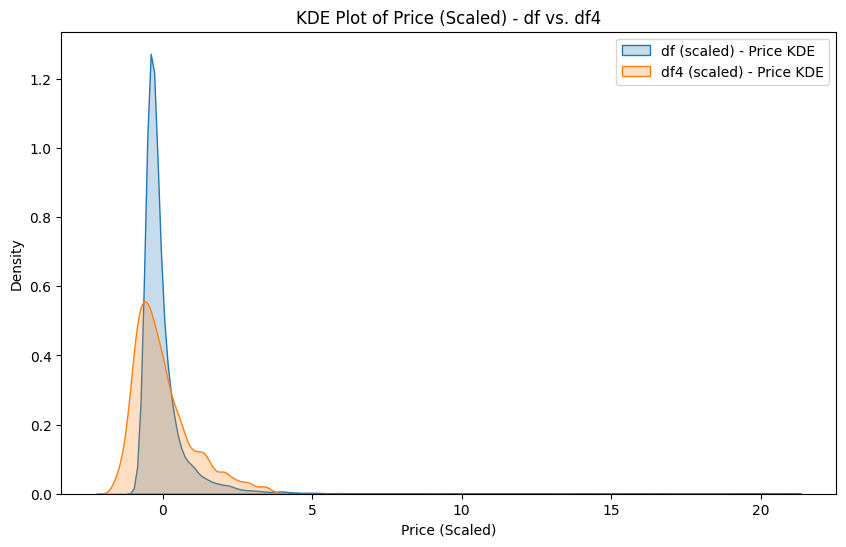

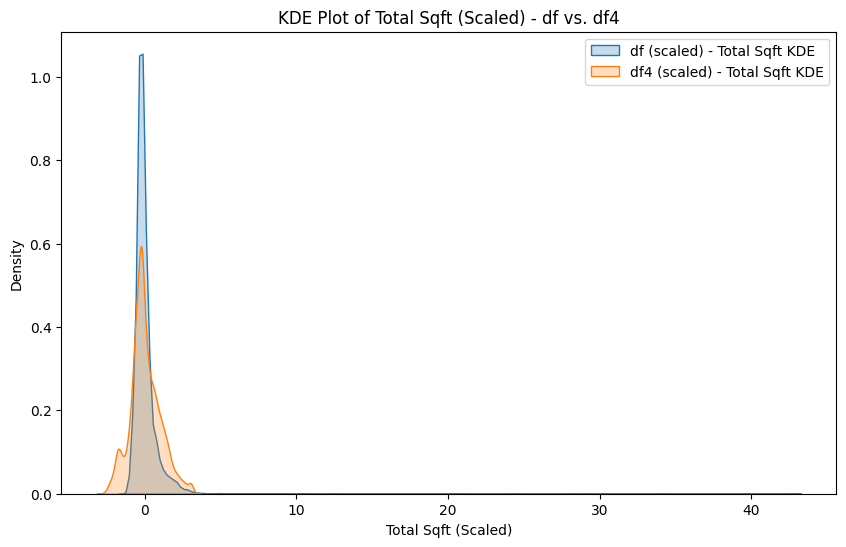

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Scale the original DataFrame 'df'
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['price', 'total_sqft']])  # Select columns for scaling
df_scaled = pd.DataFrame(df_scaled, columns=['price', 'total_sqft'], index=df.index)  # Create DataFrame

# KDE plots for price after standardization
plt.figure(figsize=(10, 6))
sns.kdeplot(df_scaled['price'], label='df (scaled) - Price KDE', fill=True)
sns.kdeplot(df4_scaled['price'], label='df4 (scaled) - Price KDE', fill=True)
plt.xlabel('Price (Scaled)')
plt.ylabel('Density')
plt.title('KDE Plot of Price (Scaled) - df vs. df4')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df_scaled['total_sqft'], label='df (scaled) - Total Sqft KDE', fill=True)
sns.kdeplot(df4_scaled['total_sqft'], label='df4 (scaled) - Total Sqft KDE', fill=True)
plt.xlabel('Total Sqft (Scaled)')
plt.ylabel('Density')
plt.title('KDE Plot of Total Sqft (Scaled) - df vs. df4')
plt.legend()
plt.show()

In [ ]:


from sklearn.preprocessing import RobustScaler


robust_scaler = RobustScaler()


df4_robust_scaled = robust_scaler.fit_transform(df4)

df4_robust_scaled

array([[-0.38287402,  0.        , -0.38372093, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88681102,  1.        ,  0.50930233, ...,  0.        ,
         0.        , -1.        ],
       [ 0.19389764,  1.        ,  0.69767442, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.69192913,  0.        ,  0.09534884, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29035433,  1.        ,  1.14883721, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53838583,  0.        , -0.18604651, ...,  0.        ,
         0.        , -1.        ]])

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df_robust_scaled = robust_scaler.fit_transform(df4) # Change df4_robust_scaled to df_robust_scaled


df_robust_scaled=pd.DataFrame(df_robust_scaled,columns=df4.columns) # Now this line should work
df_robust_scaled

,location,size,total_sqft,bath,balcony,price,price_log,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,-0.382874,0.0,-0.383721,0.0,-1.0,-0.570126,-0.737182,0.0,0.0,0.0,0.0
1,0.886811,1.0,0.509302,0.0,1.0,-0.047416,-0.049373,1.0,0.0,0.0,-1.0
2,0.193898,1.0,0.697674,1.0,-1.0,0.704850,0.590869,0.0,0.0,0.0,0.0
3,0.126969,0.0,-0.048837,0.0,-1.0,-0.298171,-0.341047,0.0,0.0,0.0,0.0
4,1.006890,0.0,-0.118605,0.0,-1.0,-0.594518,-0.778322,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10229,-0.727362,1.0,0.711628,1.0,-1.0,1.776258,1.196582,1.0,0.0,0.0,-1.0
10230,0.524606,0.0,-0.397674,0.0,0.0,-0.259190,-0.291867,0.0,0.0,0.0,0.0
10231,-0.691929,0.0,0.095349,0.0,0.0,-0.389354,-0.462711,0.0,0.0,0.0,0.0
10232,-0.290354,1.0,1.148837,1.0,1.0,1.092380,0.838689,0.0,0.0,0.0,0.0


<Axes: xlabel='price_log', ylabel='Count'>

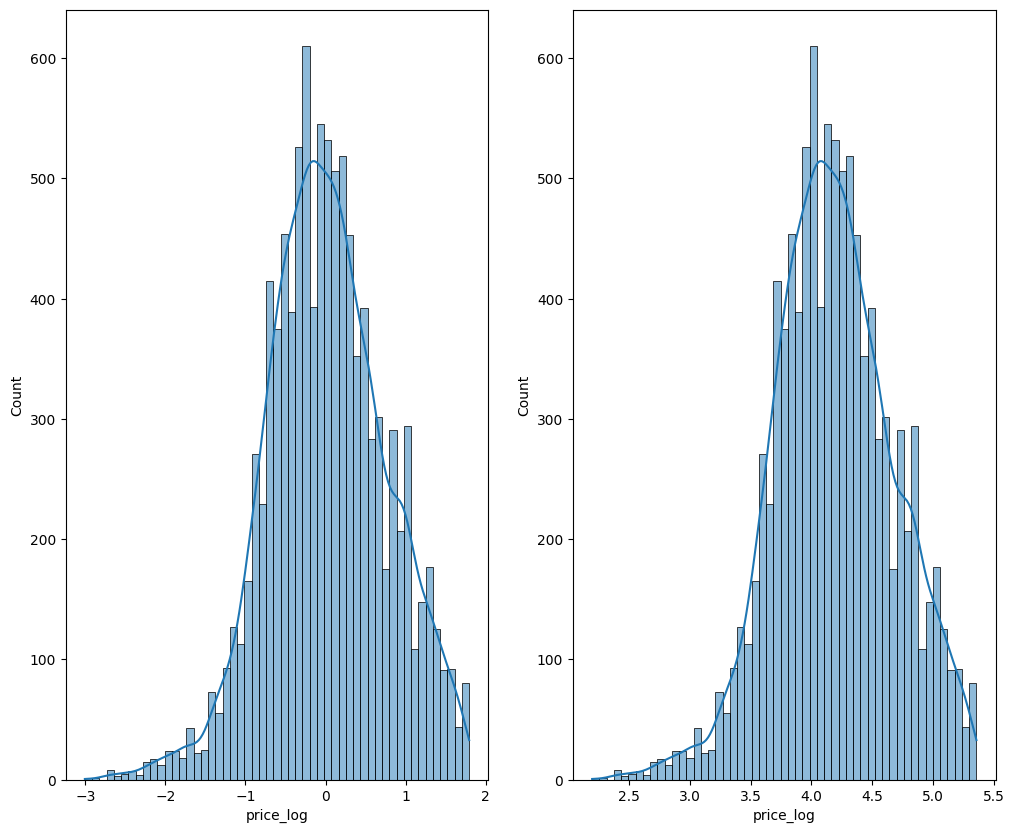

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.histplot(df_robust_scaled['price_log'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df4['price_log'],kde=True)

*Robust*

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df_robust_scaled = robust_scaler.fit_transform(df4)

df_robust_scaled

array([[-0.38287402,  0.        , -0.38372093, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88681102,  1.        ,  0.50930233, ...,  0.        ,
         0.        , -1.        ],
       [ 0.19389764,  1.        ,  0.69767442, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.69192913,  0.        ,  0.09534884, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29035433,  1.        ,  1.14883721, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53838583,  0.        , -0.18604651, ...,  0.        ,
         0.        , -1.        ]])

In [ ]:
df4

,location,size,total_sqft,bath,balcony,price,price_log,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,339,2,1056.0,2.0,1.0,39.07,3.690628,0,0,0,1
2,984,3,1440.0,2.0,3.0,62.00,4.143135,1,0,0,0
3,632,3,1521.0,3.0,1.0,95.00,4.564348,0,0,0,1
4,598,2,1200.0,2.0,1.0,51.00,3.951244,0,0,0,1
5,1045,2,1170.0,2.0,1.0,38.00,3.663562,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13308,164,3,1527.0,3.0,1.0,142.00,4.962845,1,0,0,0
13310,800,2,1050.0,2.0,2.0,52.71,3.983599,0,0,0,1
13312,182,2,1262.0,2.0,2.0,47.00,3.871201,0,0,0,1
13314,386,3,1715.0,3.0,3.0,112.00,4.727388,0,0,0,1


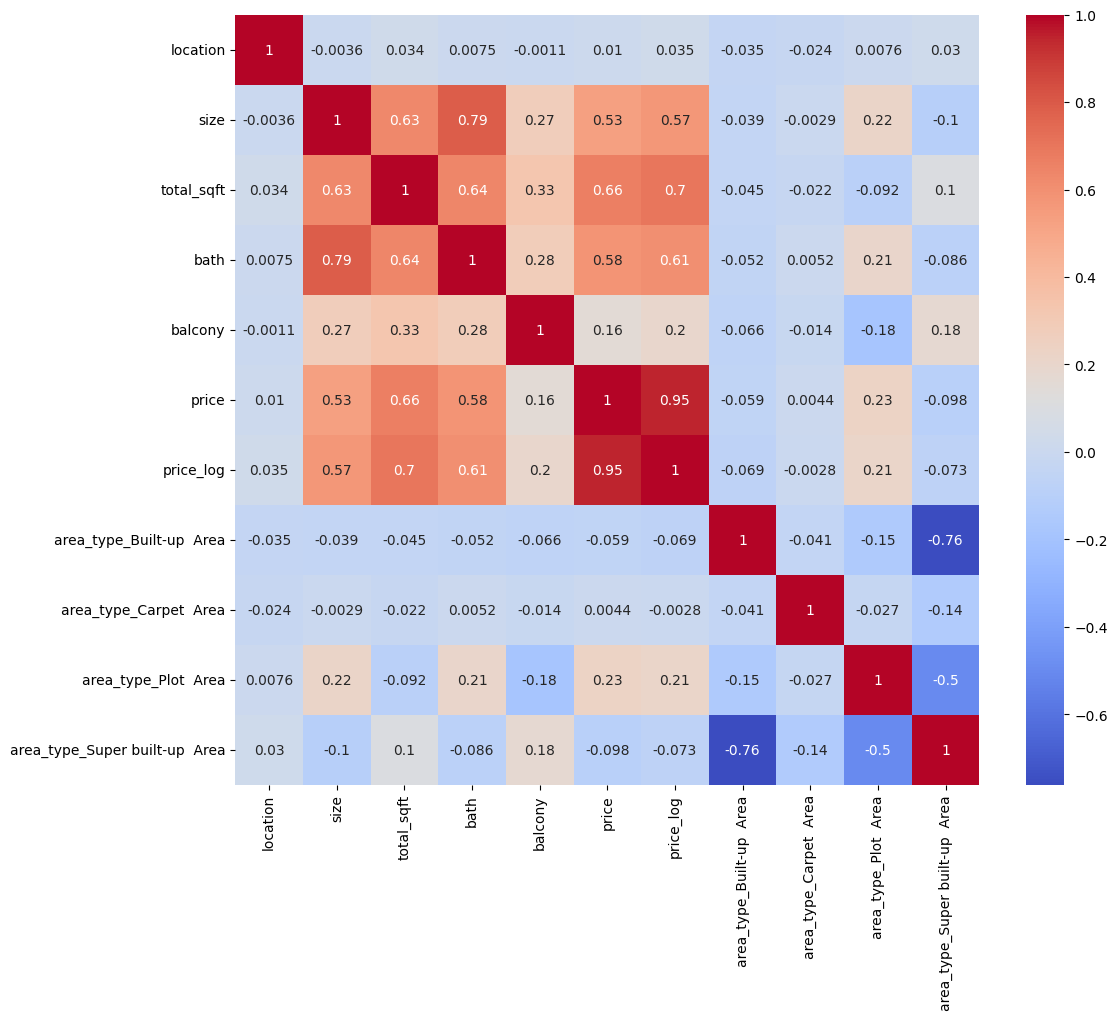

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')
plt.show()

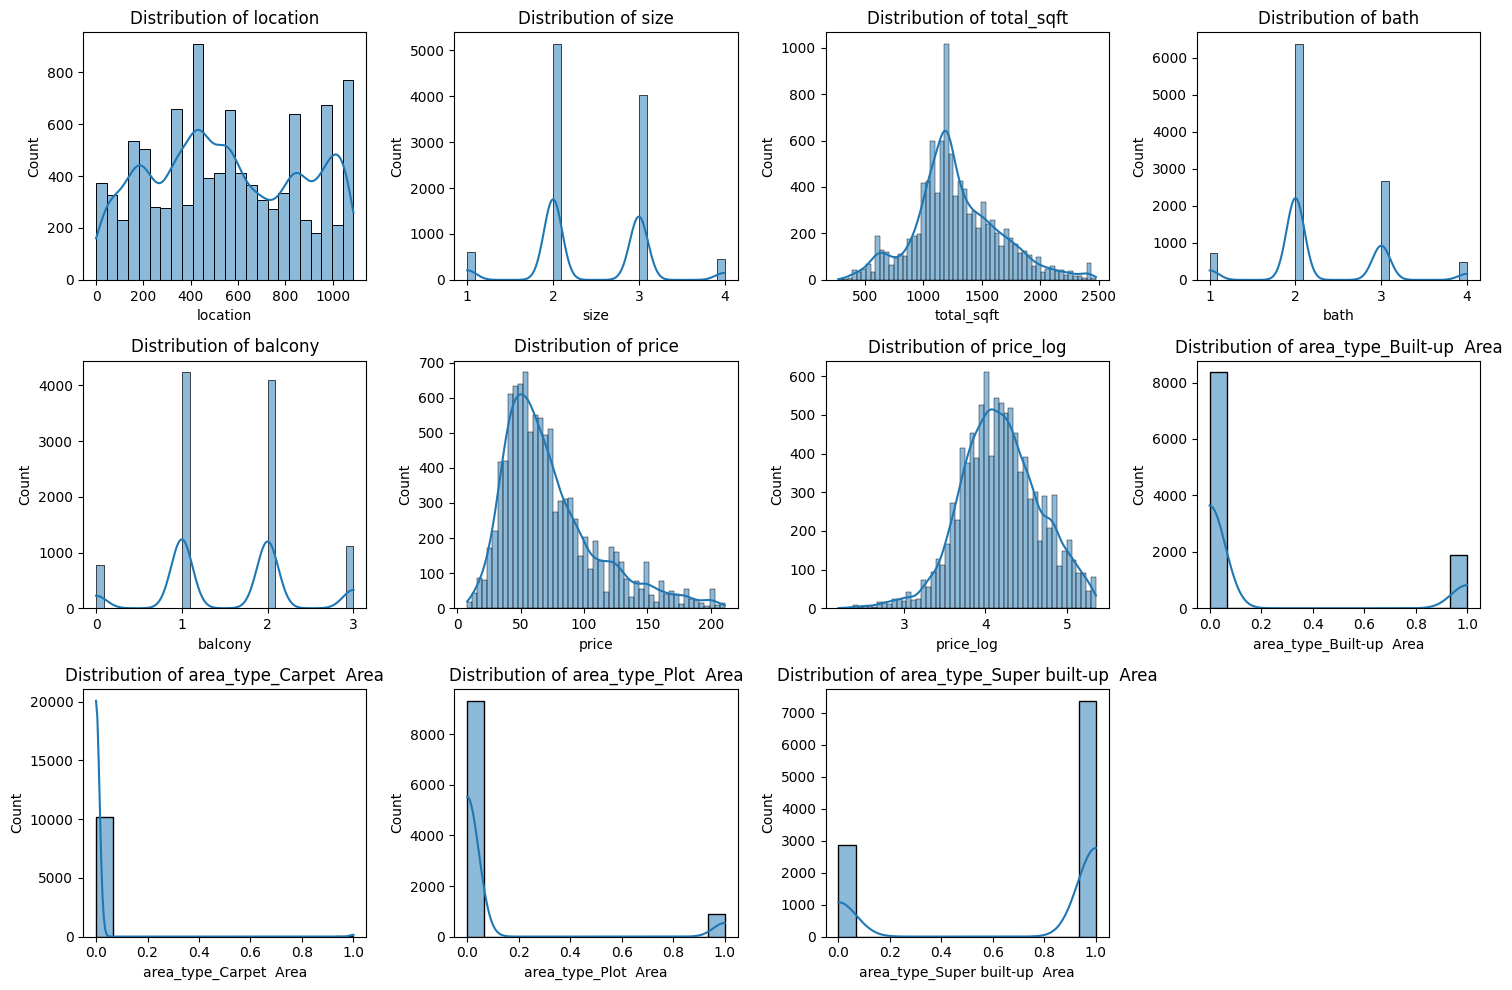

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

for i, col in enumerate(df4.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df4[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df4_scaled.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'price_log', 'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area'],
      dtype='object')

In [ ]:
df4_scaled['area_type_Built-up  Area']

,area_type_Built-up Area
0,-0.474077
1,2.109363
2,-0.474077
3,-0.474077
4,-0.474077
...,...
10229,2.109363
10230,-0.474077
10231,-0.474077
10232,-0.474077


In [ ]:
x=df4_scaled.drop('price',axis=1)
y=df4_scaled['price']

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(n_components=2)

# # variance = pca.explained_variance_ratio_
# print(variance)

In [ ]:
x.dropna(inplace=True)
pca = PCA(n_components=2)
a= pca.fit_transform(x)

In [ ]:
a

array([[-1.48145697,  0.64711151],
       [ 0.7224228 , -1.60457197],
       [ 1.44319696,  0.58044925],
       ...,
       [-0.75619085,  0.97586223],
       [ 2.42938072,  1.19570284],
       [-1.02669145, -2.2189933 ]])

In [ ]:
x=a[:,0]
y=a[:,1]

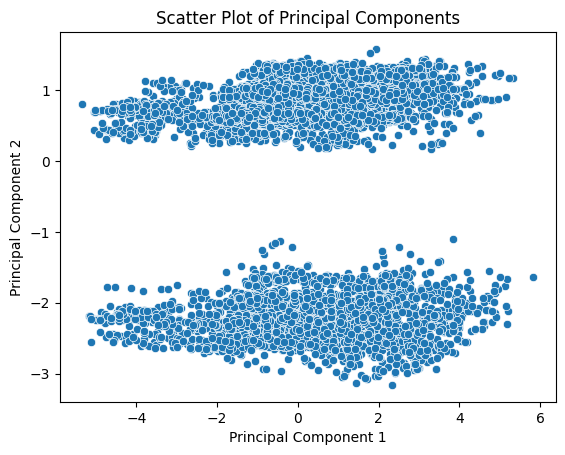

In [ ]:
pca_df = pd.DataFrame(data=a, columns=['PC1', 'PC2'])

pca_df['target'] = df4_scaled.loc[pca_df.index, 'price_log'].values

sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of Principal Components")
plt.show()

In [ ]:
df2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...
13308,Built-up Area,Bannerghatta Road,3,1527.0,3.0,1.0,142.00
13310,Super built-up Area,Rachenahalli,2,1050.0,2.0,2.0,52.71
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00


In [ ]:
df4.to_csv('df5cleand.csv',index=False)

In [ ]:


x = df4_scaled.drop('price', axis=1)
y = df4_scaled['price']

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer


x = df4_scaled.drop('price', axis=1)
y = df4_scaled['price']


imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.09244552206639758
R-squared: 0.909168227688297


In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.2125095610260639
